# [LEGALST-190] Lab 2-20


This lab will provide an introduction to numpy and scipy library of Python, preparing you for optimization and machine learning.


*Estimated Time: 30-40 minutes*

---

### Topics Covered
- Numpy Array
- Numpy matrix
- Local minima/maxima
- Scipy optimize
- Scipy integrate

### Table of Contents

1 - [Intro to Numpy](#section 1)<br>

3 - [Maxima and Minima](#section 2)<br>

2 - [Intro to Scipy](#section 3)<br>


## Intro to Numpy <a id='section 1'></a>

Numpy uses its own data structure, an array, to do numerical computations. The Numpy library is often used in scientific and engineering contexts for doing data manipulation.

For reference, here's a link to the official [Numpy documentation](https://docs.scipy.org/doc/numpy/reference/routines.html).

In [2]:
## An import statement for getting the Numpy library:
import numpy as np
## Also import csv to process the data file (black magic for now):
import csv

### Numpy Arrays

In [3]:
lst = [1, 2, 3]
values = np.array(lst)
print(values)
print(lst)

[1 2 3]
[1, 2, 3]


In [4]:
# nested array
lst = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
values = np.array(lst)
print(values)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


What does the below operation do?

In [5]:
values > 3

array([[False, False, False],
       [ True,  True,  True],
       [ True,  True,  True]], dtype=bool)

Your answer:

In [6]:
"""
Here, we will generate a multidimensional array of zeros. This might be
useful as a starting value that could be filled in.
"""
z = np.zeros((10, 2))
print(z)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


### Matrix

In [7]:
# identity matrix I of dimension 4x4
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

Let's do some matrix manipulation

In [8]:
m1 = np.array([[1, 3, 1], [1, 0, 0]])
m2 = np.array([[0, 0, 5], [7, 5, 0]])
print("matrix 1 is:\n", m1)

print("matrix 2 is:\n", m2)

matrix 1 is:
 [[1 3 1]
 [1 0 0]]
matrix 2 is:
 [[0 0 5]
 [7 5 0]]


In [9]:
# matrix sum
m1 + m2

array([[1, 3, 6],
       [8, 5, 0]])

In [10]:
# scale a matrix
m1 * 3

array([[3, 9, 3],
       [3, 0, 0]])

In [11]:
# sum of all elements in m1
m1.sum()

6

In [12]:
# mean of all elements in m2
m2.mean()

2.8333333333333335

In [13]:
# transpose of m1
m1.T

array([[1, 1],
       [3, 0],
       [1, 0]])

In [14]:
H = np.arange(1, 17)
H

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [15]:
H = H.reshape(4, 4)
H

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12],
       [13, 14, 15, 16]])

Assign H_t below to be the transpose of H

In [16]:
H_t = H.T
H_t

array([[ 1,  5,  9, 13],
       [ 2,  6, 10, 14],
       [ 3,  7, 11, 15],
       [ 4,  8, 12, 16]])

In [17]:
# dot product
I = np.eye(4)
# a matrix m's dot product with the identity matrix is matrix m
H.dot(I)

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,   7.,   8.],
       [  9.,  10.,  11.,  12.],
       [ 13.,  14.,  15.,  16.]])

In [18]:
m3 = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 3, 0], [0, 0, 0, 4]])
H * m3

array([[ 1,  0,  0,  0],
       [ 0, 12,  0,  0],
       [ 0,  0, 33,  0],
       [ 0,  0,  0, 64]])

How is dot product (.dot) different from simply multiplying two matrices together?

[Your answer here]

#### Matrix inverse
#### Theorem: the dot product of a matrix m and it's inverse is an identity matrix

Using the above theorem, to solve for x in Ax=B where A and B are matrices, what do we want to multiply both sides by?

Your answer here:

In [19]:
m3_inverse = np.linalg.inv(m3)
print("matrix m3:\n", m3)
print("\ninverse matrix m3:\n", m3_inverse)

matrix m3:
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]

inverse matrix m3:
 [[ 1.          0.          0.          0.        ]
 [ 0.          0.5         0.          0.        ]
 [ 0.          0.          0.33333333  0.        ]
 [ 0.          0.          0.          0.25      ]]


In [20]:
# do we get the identity matrix?
m3_inverse.dot(m3)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

#### exercise
1. define your own matrix
2. find its inverse
3. make sure their dot product is an identity matrix

In [21]:
# define your matrix
my_matrix = ...

# find its inverse
my_inverse = ...

In [22]:
# find their product
...

## Maxima and Minima <a id='section 2'></a>

The extrema of a function are the largest value (maxima) and smallest value (minima) of the function.

Global vs local extrema (credit: Wikipedia)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/440px-Extrema_example_original.svg.png" style="width: 500px; height: 275px;" />

By looking at the diagram , how are local maxima and minima of a function related to its derivative?

Your answer here

What does "local" actually mean?

We say that f(a) is a local maxima if f(a)≥f(x) when x is near a

Are global maxima also local maixma? Are local maxima global maxima?

Your answer here

## Intro to Scipy <a id='section 3'></a>

### Optimize

Scipy.optimize is a package that provides several commonly used optimization algorithms. Today we'll learn minimize.

insert concepts about local minima

In [23]:
# importing minimize function
from scipy.optimize import minimize

Let's define a minimization problem:

minimize $x_1x_4(x_1+x_2+x_3)+x_3$ under the conditions:
1. $x_1x_2x_3x_4\geq 25$
2. $x_1+x_2+x_3+2x_4 = 14$
3. $1\leq x_1,x_2,x_3,x_4\leq 5$

Hmmm, looks fairly complicated, but don't worry, scipy got it

In [24]:
# let's define our function
def objective(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    x4 = x[3]
    return x1*x4*(x1+x2+x3)+x3

In [25]:
# define constraints
def con1(x):
    return x[0]*x[1]*x[2]*x[3] - 25
def con2(x):
    return 14 - x[0] - x[1] - x[2] - 2*x[3]

constraint1 = {'type': 'ineq', 'fun': con1}  # constraint 1 is an inequality constraint
constraint2 = {'type': 'eq', 'fun': con2} # constraint 2 is an equality constraint

cons = [constraint1, constraint2]

In [26]:
# define bounds
bound = (1, 5)
bnds = (bound, bound, bound, bound) #the same bound applies to all four variables

In [27]:
# We need to supply initial values as a starting point for minimize function
x0 = [3, 4, 2, 3]
print(objective(x0))

83


Overall, we defined objective function, constraints, bounds, and initial values. Let's get to work.

We'll use Sequential Least SQuares Programming optimization algorithm (SLSQP)

In [28]:
solution = minimize(objective, x0, method='SLSQP', bounds=bnds, constraints=cons)

In [29]:
print(solution)

     fun: 21.499999999999119
     jac: array([ 18.00000024,   1.5       ,   2.5       ,  11.        ,   0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 18
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([ 1. ,  5. ,  5. ,  1.5])


In [30]:
# Display optimal values of each variable
solution.x

array([ 1. ,  5. ,  5. ,  1.5])

#### exercise
Find the optimal solution to the following problem:

minimize $x_1^2+x_2^2+x_3^2$, under conditions:
1. $x_1 + x_2\geq 6$
2. $x_3 + 2x_2\geq 4$
3. $1.5\leq x_1, x_2, x_3\leq 8$

Tip: 3**2 gives square of 3

In [31]:
def func(x):
    x1 = x[0]
    x2 = x[1]
    x3 = x[2]
    return x1**2 + x2**2 + x3**2
def newcon1(x):
    return x[0] + x[1] - 6
def newcon2(x):
    return x[2] + 2*x[1] - 4

In [32]:
newcons1 = {'type': 'ineq', 'fun': newcon1}
newcons2 = {'type': 'ineq', 'fun': newcon2}
newcons = [newcons1, newcons2]
bd = (1.5, 8)
bds = (bd, bd, bd)
newx0 = [1, 4, 3]


sum_square_solution = minimize(func, newx0, method='SLSQP', bounds=bds, constraints=newcons)
sum_square_solution

     fun: 20.25000000000048
     jac: array([ 6.        ,  6.00000024,  3.        ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 20
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([ 2.99999991,  3.00000009,  1.5       ])

### Integrate

scipy.integrate.quad is a function that tntegrates a function from a to b using a technique from QUADPACK library.

In [33]:
# importing integrate package
from scipy import integrate

In [34]:
# define a simple function
def f(x):
    return np.sin(x)

In [35]:
# integrate sin from 0 to pi
integrate.quad(f, 0, np.pi)

(2.0, 2.220446049250313e-14)

Our quad function returned two results, first one is the result, second one is an estimate of the absolute error

#### exercise
Find the integral of $x^2 + x$ from 3 to 10

In [36]:
def f1(x):
    return ...
...

Ellipsis

#### Integrate a normal distribution

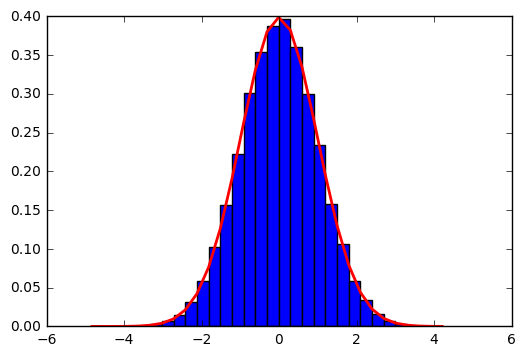

In [37]:
# let's create a normal distribution with mean 0 and standard deviation 1 by simpy running the cell
mu, sigma = 0, 1
s = np.random.normal(mu, sigma, 100000)

import matplotlib.pyplot as plt
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')
plt.show()

In [42]:
# importing normal d
from scipy.stats import norm

CDF is cumulative distribution function. CDF(x) is the probability that a normal distribution takes on value less than or equal to x.

For a standard normal distribution, what would CDF(0) be?

Your answer here

Run the cell below to confirm your answer

In [43]:
norm.cdf(0)

0.5

Using the cdf, integrate the normal distribution from -0.5 to 0.5

---
Notebook developed by: Tian Qin

Data Science Modules: http://data.berkeley.edu/education/modules
